<a href="https://colab.research.google.com/github/aluiz97/Final-Thesis/blob/main/Tyre_Neural_Network_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [ ]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

from matplotlib import cm
from matplotlib.ticker import LinearLocator
from sklearn.model_selection import train_test_split 
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

DataFrame Train/Test

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Datasets/Tyre/3TyresTyreData.csv")

Pré-Processamento

In [ ]:
scaler = StandardScaler()
dataset_normalized = scaler.fit_transform(dataset) #Normalização

In [ ]:
dataset

,slip_angle,camber,load,size,rim,lateral_force
0,-9.0,0.0,75,6.2,6,-1.25
1,-8.0,0.0,75,6.2,6,-1.19
2,-7.0,0.0,75,6.2,6,-1.15
3,-6.0,0.0,75,6.2,6,-1.08
4,-5.0,0.0,75,6.2,6,-1.00
...,...,...,...,...,...,...
1819,5.0,3.5,300,8.2,9,2.01
1820,6.0,3.5,300,8.2,9,2.27
1821,7.0,3.5,300,8.2,9,2.52
1822,8.0,3.5,300,8.2,9,2.74


In [ ]:
x = dataset_normalized[:, 0:5]
y = dataset_normalized[:, 5]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6) #Divisão entre os dataframes de treino e de teste

Redes neurais para regressão não linear

In [ ]:
def model():
  regression = MLPRegressor(max_iter = 5000, verbose = False, solver='adam', activation='relu',  hidden_layer_sizes = (55, 71)) #Modelo de redes meurais
  history = regression.fit(x_train, y_train.ravel()) #Treino do modelo com os dados de pneu

In [ ]:
def save_model():
  filename = 'finalized_model.sav'
  joblib.dump(regression, filename)

In [ ]:
regression = joblib.load('/content/drive/MyDrive/Colab Models/finalized_model.sav')

In [ ]:
y_pred = regression.predict(x_test) #resultados obtido com os dados de treino

Função de perda

<Figure size 576x432 with 0 Axes>

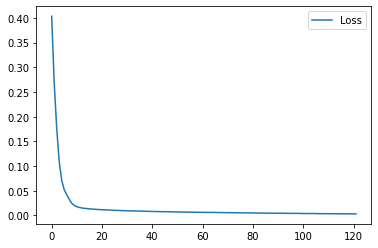

In [ ]:
#plt.rcParams.update({'font.size':12}) 
plt.figure(figsize = [8,6])
pd.DataFrame(regression.loss_curve_).plot() #Função de perda decaindo
plt.legend(['Loss'])

Comparação entre todas as forças laterais reais e previstas

Text(0, 0.5, 'Força Lateral Normalizada')

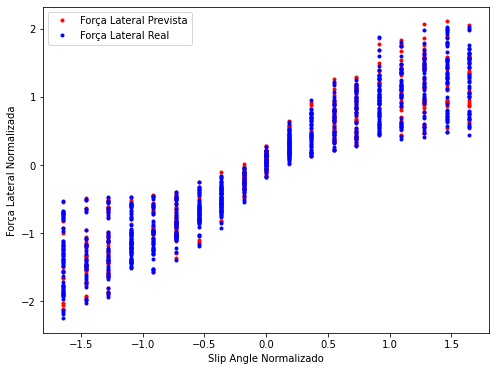

In [ ]:
plt.figure(figsize = [8,6])
plt.plot(x_test[:, 0], y_pred, 'r.')
plt.plot(x_test[:, 0], y_test, 'b.') 
plt.legend(['Força Lateral Prevista', 'Força Lateral Real'])
plt.xlabel('Slip Angle Normalizado'); plt.ylabel('Força Lateral Normalizada')  

Avaliação da acurácia do modelo

In [ ]:
def tendencia(var):
  yt = var
  return yt

In [ ]:
tend_x = np.linspace(-2.5,2.5, 10)
tend_y = tendencia(tend_x)

In [ ]:
df_x_train_normalized = pd.DataFrame(x_train, columns=['slip_angle', 'camber', 'load', 'size', 'rim'])
df_y_train_normalized = pd.DataFrame(y_train, columns=['lateral_force'])

df_x_test_normalized = pd.DataFrame(x_test, columns=['slip_angle', 'camber', 'load', 'size', 'rim'])
df_y_test_normalized = pd.DataFrame(y_test, columns=['lateral_force'])

df_train_normalized = df_x_train_normalized.join(df_y_train_normalized)
df_test_normalized = df_x_test_normalized.join(df_y_test_normalized)

In [ ]:
df_y_pred_normalized = pd.DataFrame(y_pred, columns=['lateral_force'])

df_pred_normalized = df_x_test_normalized.join(df_y_pred_normalized)

In [ ]:
df_train = pd.DataFrame(scaler.inverse_transform(df_train_normalized), columns = ['slip_angle', 'camber', 'load', 'size', 'rim', 'lateral_force'])
df_test = pd.DataFrame(scaler.inverse_transform(df_test_normalized), columns = ['slip_angle', 'camber', 'load', 'size', 'rim', 'lateral_force'])

df_pred = pd.DataFrame(scaler.inverse_transform(df_pred_normalized), columns = ['slip_angle', 'camber', 'load', 'size', 'rim', 'lateral_force'])

In [ ]:
df_train = df_train.round(2)
df_test = df_test.round(2)
df_pred = df_pred.round(2)

Avaliação dos resultados obtidos para camber e carga específica

In [ ]:
camber = 2.5
load = 225
size = 7.2
rim = 7

In [ ]:
#Filtros para encontrar os parâmetros a serem analisados
df_train_filtered = df_train[df_train['load'].isin([load])]
df_train_filtered_2 = df_train_filtered[df_train_filtered['camber'].isin([camber])]
df_train_filtered_3 = df_train_filtered_2[df_train_filtered['size'].isin([size])]
df_train_filtered_4 = df_train_filtered[df_train_filtered['rim'].isin([rim])]

df_test_filtered = df_test[df_test['load'].isin([load])]
df_test_filtered_2 = df_test_filtered[df_test_filtered['camber'].isin([camber])]
df_test_filtered_3 = df_test_filtered_2[df_test_filtered['size'].isin([size])]
df_test_filtered_4 = df_test_filtered_3[df_test_filtered['rim'].isin([rim])]

dataset_filtered = dataset[dataset['load'].isin([load])]
dataset_filtered_2 = dataset_filtered[dataset_filtered['camber'].isin([camber])]
dataset_filtered_3 = dataset_filtered_2[dataset_filtered['size'].isin([size])]
dataset_filtered_4 = dataset_filtered_3[dataset_filtered['rim'].isin([rim])]

df_pred_filtered = df_pred[df_pred['load'].isin([load])]
df_pred_filtered_2 = df_pred_filtered[df_pred_filtered['camber'].isin([camber])]
df_pred_filtered_3 = df_pred_filtered_2[df_pred_filtered['size'].isin([size])]
df_pred_filtered_4 = df_pred_filtered_3[df_pred_filtered['rim'].isin([rim])]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFr

Text(0.5, 0.98, 'Câmber: 2.5 °; Carga: 225 kg; Size: 7.2 inch; Rim: 7 inch')

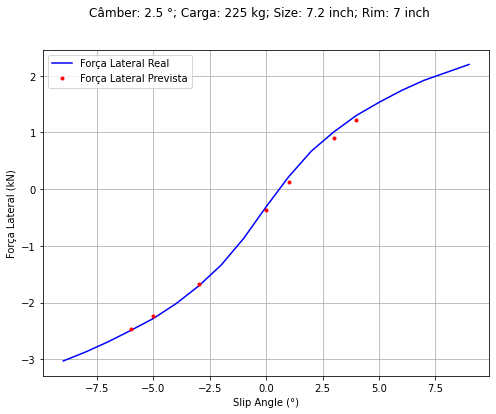

In [ ]:
plt.figure(figsize = [8,6])
plt.plot(dataset_filtered_4['slip_angle'], dataset_filtered_4['lateral_force'], 'b-')
plt.plot(df_pred_filtered_4['slip_angle'], df_pred_filtered_4['lateral_force'], 'r.')
plt.legend(['Força Lateral Real', 'Força Lateral Prevista'])
plt.xlabel('Slip Angle (°)'); plt.ylabel('Força Lateral (kN)')
plt.grid(True)
plt.suptitle('Câmber: '+ str(camber) + ' °; Carga: ' + str(load) + ' kg;' + ' Size: ' + str(size) + ' inch;' + ' Rim: ' + str(rim) + ' inch')

Predição

In [ ]:
df_predict = pd.read_csv('/content/drive/MyDrive/Colab Datasets/Tyre/3TyresPredict.csv')

In [ ]:
#Camber e carga para predição
camber_predict = 2.5 #2.15
load_predict = 225 #205
size_predict = 7.2 #6.25
rim_predict =  7 #6.5

for i in range(len(df_predict)):
  df_predict['camber'][i] = camber_predict
  df_predict['load'][i] = load_predict
  df_predict['size'][i] = size_predict
  df_predict['rim'][i] = rim_predict

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dis

In [ ]:
predict_normalized = scaler.transform(df_predict) #Normalização dos dados a serem predizidos

In [ ]:
x_predict_normalized = predict_normalized[:, 0:5]

In [ ]:
results_pred = regression.predict(x_predict_normalized) #Predição dos resultados do modelo

In [ ]:
df_y_predict_normalized = pd.DataFrame(results_pred, columns = ['lateral_force'])

In [ ]:
df_x_predict_normalized = pd.DataFrame(x_predict_normalized, columns = ['slip_angle', 'camber', 'load', 'size', 'rim'])

In [ ]:
df_predict_normalized = df_x_predict_normalized.join(df_y_predict_normalized)

In [ ]:
df_predict = pd.DataFrame(scaler.inverse_transform(df_predict_normalized), columns = ['slip_angle', 'camber', 'load', 'size', 'rim', 'lateral_force'])
df_predict = df_predict.round(2)

Resultados obtidos pela predição

Text(0.5, 0.98, 'Câmber: 2.5 °; Carga: 225.0 kg; Size: 7.2 inch; Rim: 7.0 inch')

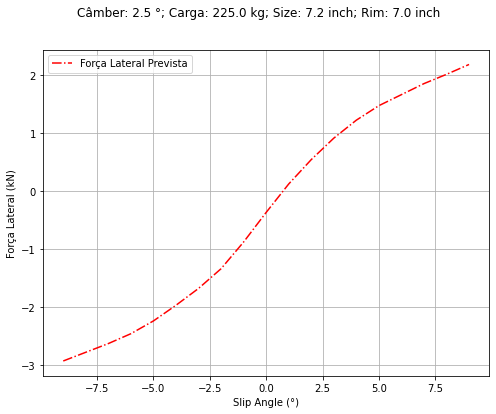

In [ ]:
plt.figure(figsize = [8,6])
plt.plot(df_predict['slip_angle'], df_predict['lateral_force'], 'r-.')
plt.legend([ 'Força Lateral Prevista'])
plt.xlabel('Slip Angle (°)'); plt.ylabel('Força Lateral (kN)')
plt.grid(True)
plt.suptitle('Câmber: '+ str(df_predict['camber'][0]) + ' °; Carga: ' + str(df_predict['load'][0]) + ' kg; Size: '+ str(df_predict['size'][0]) + ' inch; Rim: ' + str(df_predict['rim'][0]) + ' inch')

In [ ]:
df_predict

,slip_angle,camber,load,size,rim,lateral_force
0,-9.0,2.5,225.0,7.2,7.0,-2.93
1,-8.0,2.5,225.0,7.2,7.0,-2.78
2,-7.0,2.5,225.0,7.2,7.0,-2.63
3,-6.0,2.5,225.0,7.2,7.0,-2.46
4,-5.0,2.5,225.0,7.2,7.0,-2.24
5,-4.0,2.5,225.0,7.2,7.0,-1.97
6,-3.0,2.5,225.0,7.2,7.0,-1.68
7,-2.0,2.5,225.0,7.2,7.0,-1.34
8,-1.0,2.5,225.0,7.2,7.0,-0.88
9,0.0,2.5,225.0,7.2,7.0,-0.37


Comparação entre força real e prevista

Text(0.5, 0.98, 'Câmber: 2.5 °; Carga: 225.0 kg; Size: 7.2 inch; Rim: 7.0 inch')

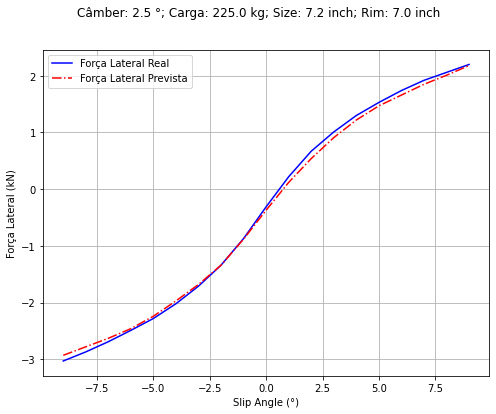

In [ ]:
plt.figure(figsize = [8,6])
plt.plot(dataset_filtered_4['slip_angle'], dataset_filtered_4['lateral_force'], 'b-')
plt.plot(df_predict['slip_angle'], df_predict['lateral_force'], 'r-.')
plt.legend([ 'Força Lateral Real','Força Lateral Prevista'])
plt.xlabel('Slip Angle (°)'); plt.ylabel('Força Lateral (kN)')
plt.grid(True)
plt.suptitle('Câmber: '+ str(df_predict['camber'][0]) + ' °; Carga: ' + str(df_predict['load'][0]) + ' kg; Size: '+ str(df_predict['size'][0]) + ' inch; Rim: ' + str(df_predict['rim'][0]) + ' inch')

R2 Score

In [ ]:
r2 = 100*r2_score(y_test, y_pred).round(4)

In [ ]:
print ("R2 Score: " + str(r2) + " %")

R2 Score: 99.38 %


Text(0, 0.5, 'Força Lateral Prevista Normalizada')

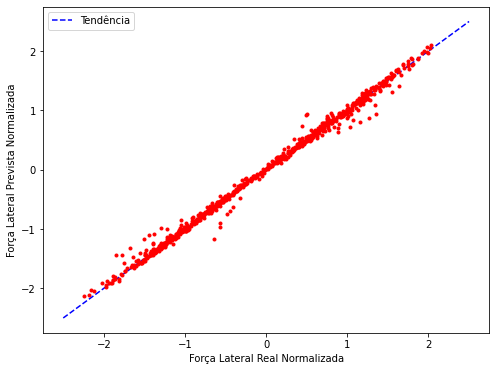

In [ ]:
plt.figure(figsize = [8,6])
plt.plot(tend_y, tend_x, 'b--')
plt.plot(y_test, y_pred, 'r.')
plt.legend(['Tendência'])
plt.xlabel('Força Lateral Real Normalizada'); plt.ylabel('Força Lateral Prevista Normalizada')

In [ ]:
score_train = 100*regression.score(x_train, y_train).round(4) #R2 Score

In [ ]:
score_test = 100*regression.score(x_test, y_test).round(4) #R2 Score

In [ ]:
print ("Score Train: " + str(score_train) + " %")

Score Train: 99.42 %


In [ ]:
print ("Score Test: " + str(score_test) + " %")

Score Test: 99.38 %


Mean Absolute Error

In [ ]:
mae = mean_absolute_error(y_test, y_pred).round(4)

In [ ]:
print("Erro médio absoluto das forças laterais previstas: " + str(mae) + " kN") 

Erro médio absoluto das forças laterais previstas: 0.0451 kN


Fit Verification

In [ ]:
y_pred_train = regression.predict(x_train)

In [ ]:
mae_train = mean_absolute_error(y_train, y_pred_train).round(4)

In [ ]:
print("Erro médio absoluto das forças laterais de treino: " + str(mae_train) + " kN") 

Erro médio absoluto das forças laterais de treino: 0.041 kN


In [ ]:
print('Diferença entre o erro de teste e o erro de treino: ' + str((mae - mae_train).round(4))) #O erro de treino um pouco menor que o erro de teste indica uma boa performance do modelo,
                                                                                     #sem overfit ou underfit.

Diferença entre o erro de teste e o erro de treino: 0.0041


Arquitetura Ótima

In [ ]:
# Define o número de neurônios em cada camada e a matriz que comporta o MAE para cada etapa

n1 = np.arange(1, 101)
n2 = np.arange(1, 101)

a = len(n1)
b = len(n2)

mae_2 = np.zeros((a, b))

In [ ]:
# Gera os dados de erro para os números de neurônios em cada camada

def arquitetura():

  for i in range(a):

    for j in range(b):

      regression_2 = MLPRegressor(max_iter = 5000, verbose = False, solver='adam', activation='relu',  hidden_layer_sizes= (n1[i], n2[j])) #Modelo de redes meurais
      history_2 = regression_2.fit(x_train, y_train.ravel()) #Treino do modelo com os dados de pneu
      y_pred_2 = regression_2.predict(x_test) #resultados obtido com os dados de treino

      mae_2[i, j] = mean_absolute_error(y_test, y_pred_2).round(4)

In [ ]:
def grafico_arquitetura(mae):
  
# Make data.
  N1, N2 = np.meshgrid(n1, n2)

  fig = plt.figure(figsize = [12,8])
  ax = fig.gca(projection = '3d')
  surf = ax.plot_surface(N1, N2, mae, cmap = cm.jet, linewidth=0)

# Add a color bar which maps values to colors.
  cbar = fig.colorbar(surf, shrink=0.4, aspect=10)

  plt.title('Numbers of neurons in each layer per Mean Absolute Error')
  plt.xlabel('Numbers of neurons in Hidden Layer 1'); plt.ylabel('Numbers of neurons in Hidden Layer 2')
  plt.tight_layout()
  cbar.set_label('Mean Absolute Error (kN)')
  plt.show()

In [ ]:
def save_results():

  results_mae_2 = pd.DataFrame(mae_2)
  results_mae_2.to_csv('results_mae_2.csv')

In [ ]:
pd_mae_2_results = pd.read_csv('/content/drive/MyDrive/Colab Datasets/Tyre/2_results_mae_2.csv')
pd_mae_2_results.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
mae_2_results = pd_mae_2_results.to_numpy()

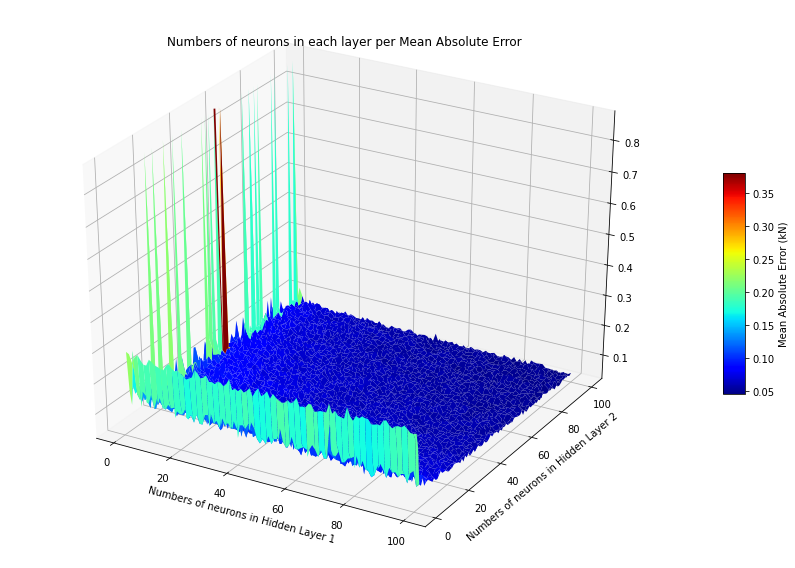

In [ ]:
grafico_arquitetura(mae_2_results)

Mínimo de neurônios para encontrar o erro máximo desejado

In [ ]:
error = 0.045

error_filtered = pd_mae_2_results[pd_mae_2_results <= error].to_numpy()

In [ ]:
neurons_decision = []

for i in range (a):
  for j in range (b):

    if error_filtered[i, j] > 0:
      neurons_decision.append([i + 1, j + 1])

In [ ]:
neurons_decision_sum = []

for i in range(len(neurons_decision)):
  neurons_decision_sum.append(sum(neurons_decision[i]))

In [ ]:
neuron_layer_1 = []
neuron_layer_2 = []

for i in range(len(neurons_decision)):
  neuron_layer_1.append(neurons_decision[i][0])
  neuron_layer_2.append(neurons_decision[i][1])

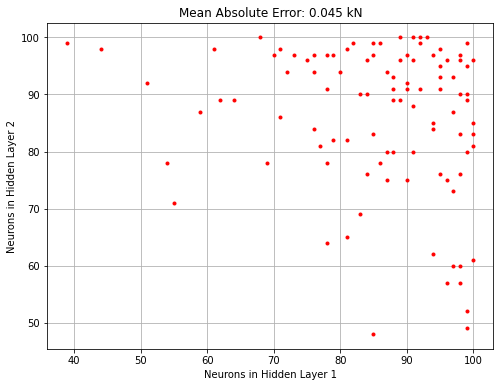

In [ ]:
plt.figure(figsize = [8,6])
plt.plot(neuron_layer_1, neuron_layer_2, 'r.')
#plt.legend([ 'Number of neurons in each layer'])
plt.xlabel('Neurons in Hidden Layer 1'); plt.ylabel('Neurons in Hidden Layer 2')
plt.title('Mean Absolute Error: '+ str(error) + ' kN')
plt.grid(True)

In [ ]:
coord_num_min = neurons_decision_sum.index(min(neurons_decision_sum))

In [ ]:
num_min_neurons = neurons_decision[coord_num_min]

In [ ]:
num_min_neurons

[55, 71]

In [ ]:
print('Erro absoluto médio requerido: ' + str(error) + ' kN, Número mínimo de neurônios na camada oculta 1: ' + 
      str(num_min_neurons[0]) + ', Número mínimo de neurônios na camada oculta 2: ' + str(num_min_neurons[1]))

Erro absoluto médio requerido: 0.045 kN, Número mínimo de neurônios na camada oculta 1: 55, Número mínimo de neurônios na camada oculta 2: 71
